In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
data = pd.read_csv('./commodity_trade_statistics_data.csv')

/Users/mihailojoksimovic/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
serbia = data[data['country_or_area'] == 'Serbia'].copy()
data = None

In [4]:
serbia.head(5)

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
43976,Serbia,2016,10111,"Horses, live pure-bred breeding",Export,4583,1000.0,No Quantity,NaN,01_live_animals
43977,Serbia,2016,10111,"Horses, live pure-bred breeding",Import,10719,800.0,No Quantity,NaN,01_live_animals
43978,Serbia,2016,10119,"Horses, live except pure-bred breeding",Export,70379,14990.0,No Quantity,NaN,01_live_animals
43979,Serbia,2016,10119,"Horses, live except pure-bred breeding",Import,31415,5500.0,Number of items,2.0,01_live_animals
43980,Serbia,2016,10120,"Asses, mules and hinnies, live",Export,1535,950.0,No Quantity,NaN,01_live_animals


In [5]:
commodities_to_ignore = ['99_commodities_not_specified_according_to_kind', 'all_commodities']

serbia_import = serbia[(serbia['flow'] == 'Import') & (~serbia['category'].isin(commodities_to_ignore))]
serbia_export = serbia[(serbia['flow'] == 'Export') & (~serbia['category'].isin(commodities_to_ignore))]

In [6]:
serbia_export.groupby('category')['trade_usd'].sum().sort_values(ascending=False).head(10)

category
10_cereals                                               4614623821
17_sugars_and_sugar_confectionery                        1997498463
19_cereal_flour_starch_milk_preparations_and_products    1236705996
24_tobacco_and_manufactured_tobacco_substitutes          1226883772
21_miscellaneous_edible_preparations                     1204277560
23_residues_wastes_of_food_industry_animal_fodder        1066159135
49_printed_books_newspapers_pictures_etc                  723306221
18_cocoa_and_cocoa_preparations                           720311935
31_fertilizers                                            629048899
86_railway_tramway_locomotives_rolling_stock_equipmen     603530563
Name: trade_usd, dtype: int64

In [7]:
# So cereals seem to be most traded commodity
# Let's filter data to it and see how it's traded over time

cereals = serbia_export[serbia_export['category'].isin(['10_cereals'])]

In [8]:
cereals.head(5)

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
838877,Serbia,2016,100110,Durum wheat,Export,7641980,45885944.0,Weight in kilograms,45885944.0,10_cereals
838879,Serbia,2016,100190,"Wheat except durum wheat, and meslin",Export,126979148,793157034.0,Weight in kilograms,793157034.0,10_cereals
838881,Serbia,2016,100200,Rye,Export,109276,439935.0,Weight in kilograms,439935.0,10_cereals
838883,Serbia,2016,100300,Barley,Export,4944244,23794589.0,Weight in kilograms,23794589.0,10_cereals
838885,Serbia,2016,100400,Oats,Export,513747,1209245.0,Weight in kilograms,1209245.0,10_cereals


In [9]:
# Which cereal is most traded one?

cereals.groupby('commodity')['trade_usd'].sum().sort_values(ascending=False).head(10)

commodity
Maize except seed corn                  3247054316
Wheat except durum wheat, and meslin     811279564
Maize (corn) seed                        376171280
Durum wheat                              121529582
Barley                                    44589407
Cereals unmilled nes                       4638938
Rice, semi-milled or wholly milled         4275227
Oats                                       3566482
Rye                                         576861
Millet                                      241384
Name: trade_usd, dtype: int64

In [10]:
# Ok so maize seems to be most traded commodity. Let's try playing with it a bit.

maize = cereals[cereals['commodity'] == 'Maize except seed corn']

In [11]:
maize.head(5)

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
838889,Serbia,2016,100590,Maize except seed corn,Export,335164992,2.056478e+09,Weight in kilograms,2.056478e+09,10_cereals
838921,Serbia,2015,100590,Maize except seed corn,Export,335162851,2.090024e+09,Weight in kilograms,2.090024e+09,10_cereals
838953,Serbia,2014,100590,Maize except seed corn,Export,448920443,2.372557e+09,Weight in kilograms,2.372557e+09,10_cereals
838984,Serbia,2013,100590,Maize except seed corn,Export,159591100,7.792898e+08,Weight in kilograms,7.792898e+08,10_cereals
839015,Serbia,2012,100590,Maize except seed corn,Export,532965769,2.118964e+09,Weight in kilograms,2.118964e+09,10_cereals


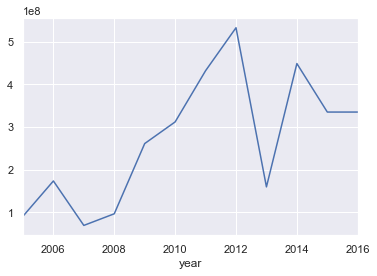

In [12]:
# Let's plot it over years to see how it changes (if it changes)

maize.groupby('year')['trade_usd'].sum().plot()

In [13]:
# Well we don't have that much data for predicting and really the sales of Maize vary quite a lot
maize_yearly = maize.groupby('year')['trade_usd'].sum()

In [14]:
maize_yearly

year
2005     90707018
2006    173484498
2007     69198689
2008     96490166
2009    261230876
2010    312013405
2011    432124509
2012    532965769
2013    159591100
2014    448920443
2015    335162851
2016    335164992
Name: trade_usd, dtype: int64

In [15]:
maize_yearly.var()

2.3805145167449692e+16

In [16]:
maize_yearly.std()

154289160.88776195

In [17]:
# Let's convert to millions and see the variance, in millions

maize_yearly_million = maize_yearly / pow(10, 6)

In [18]:
maize_yearly_million

year
2005     90.707018
2006    173.484498
2007     69.198689
2008     96.490166
2009    261.230876
2010    312.013405
2011    432.124509
2012    532.965769
2013    159.591100
2014    448.920443
2015    335.162851
2016    335.164992
Name: trade_usd, dtype: float64

In [19]:
maize_yearly_million.std()

154.28916088776197

In [20]:
a = np.array([[1, 2], [3, 4]])

In [21]:
a

array([[1, 2],
       [3, 4]])

In [22]:
np.std(a, axis=0)

array([1., 1.])

In [23]:
# Ok, let's look for commodity with lowest std.

cereals.commodity.unique()


array(['Durum wheat', 'Wheat except durum wheat, and meslin', 'Rye',
       'Barley', 'Oats', 'Maize (corn) seed', 'Maize except seed corn',
       'Rice in the husk (paddy or rough)', 'Rice, husked (brown)',
       'Rice, semi-milled or wholly milled', 'Rice, broken',
       'Grain sorghum', 'Buckwheat', 'Millet', 'Canary seed',
       'Cereals unmilled nes'], dtype=object)

In [24]:
# Hashmap where keys are Commodity names. Values will be standard deviations for each
stds = dict.fromkeys(cereals.commodity.unique(), None)

In [32]:
for commodity, val in stds.items():
    stds[commodity] = serbia_export[serbia_export['commodity'] == commodity]['trade_usd'].std()

In [33]:
stds

{'Durum wheat': 9716127.452358289,
 'Wheat except durum wheat, and meslin': 66779035.64978072,
 'Rye': 29288.79105833989,
 'Barley': 2728121.718913865,
 'Oats': 158285.7005468468,
 'Maize (corn) seed': 16702573.507818408,
 'Maize except seed corn': 154289160.88776195,
 'Rice in the husk (paddy or rough)': 3594.048327134428,
 'Rice, husked (brown)': 16141.416549305142,
 'Rice, semi-milled or wholly milled': 188673.90417015972,
 'Rice, broken': 18764.621641726295,
 'Grain sorghum': 11240.32000515029,
 'Buckwheat': 5562.027091235385,
 'Millet': 9878.09951357041,
 'Canary seed': 17222.91769223012,
 'Cereals unmilled nes': 227827.41678729033}

In [34]:
import operator
sorted(stds.items(), key=operator.itemgetter(1))

[('Rice in the husk (paddy or rough)', 3594.048327134428),
 ('Buckwheat', 5562.027091235385),
 ('Millet', 9878.09951357041),
 ('Grain sorghum', 11240.32000515029),
 ('Rice, husked (brown)', 16141.416549305142),
 ('Canary seed', 17222.91769223012),
 ('Rice, broken', 18764.621641726295),
 ('Rye', 29288.79105833989),
 ('Oats', 158285.7005468468),
 ('Rice, semi-milled or wholly milled', 188673.90417015972),
 ('Cereals unmilled nes', 227827.41678729033),
 ('Barley', 2728121.718913865),
 ('Durum wheat', 9716127.452358289),
 ('Maize (corn) seed', 16702573.507818408),
 ('Wheat except durum wheat, and meslin', 66779035.64978072),
 ('Maize except seed corn', 154289160.88776195)]

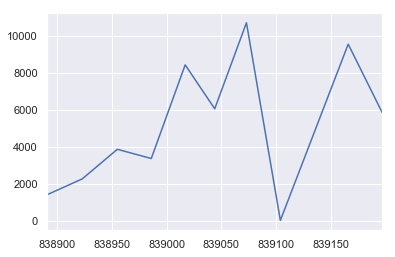

In [35]:
cereals[cereals['commodity'] == 'Rice in the husk (paddy or rough)']['trade_usd'].plot()

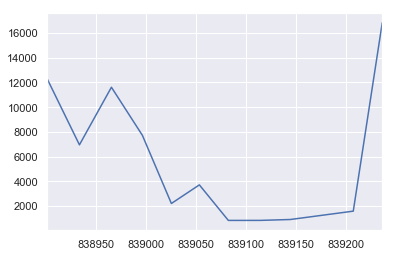

In [36]:
cereals[cereals['commodity'] == 'Buckwheat']['trade_usd'].plot()

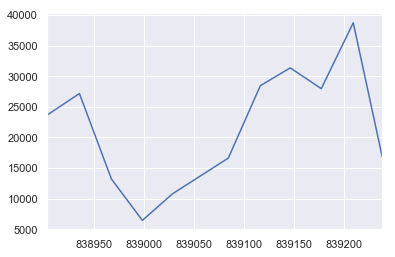

In [37]:
cereals[cereals['commodity'] == 'Millet']['trade_usd'].plot()

In [38]:
cereals[cereals['commodity'] == 'Rice in the husk (paddy or rough)']

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
838891,Serbia,2016,100610,Rice in the husk (paddy or rough),Export,1408,1665.0,Weight in kilograms,1665.0,10_cereals
838923,Serbia,2015,100610,Rice in the husk (paddy or rough),Export,2265,3280.0,Weight in kilograms,3280.0,10_cereals
838955,Serbia,2014,100610,Rice in the husk (paddy or rough),Export,3865,2572.0,Weight in kilograms,2572.0,10_cereals
838986,Serbia,2013,100610,Rice in the husk (paddy or rough),Export,3366,2900.0,Weight in kilograms,2900.0,10_cereals
839017,Serbia,2012,100610,Rice in the husk (paddy or rough),Export,8440,8935.0,Weight in kilograms,8935.0,10_cereals
839044,Serbia,2011,100610,Rice in the husk (paddy or rough),Export,6060,4518.0,Weight in kilograms,4518.0,10_cereals
839073,Serbia,2010,100610,Rice in the husk (paddy or rough),Export,10723,11200.0,Weight in kilograms,11200.0,10_cereals
839104,Serbia,2009,100610,Rice in the husk (paddy or rough),Export,11,40.0,Weight in kilograms,40.0,10_cereals
839166,Serbia,2007,100610,Rice in the husk (paddy or rough),Export,9562,11937.0,Weight in kilograms,11937.0,10_cereals
839197,Serbia,2006,100610,Rice in the husk (paddy or rough),Export,5864,8302.0,Weight in kilograms,8302.0,10_cereals
